In [252]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

I imported the libraries that we have used throughout the course here so that I will run into less problems as I continue building my model.

In [255]:
current_directory = os.getcwd()
df = pd.read_csv('student_lifestyle_dataset.csv')

I chose to use a library based on students' lifestyles from India during the 2023-2024 school year. The students were asked to fill out a Google form, and they filled in the amount of time they spent doing each activity (studying, extracurriculars, sleep, social, and physical activity) along with their stress level and GPA. In my analysis, I am trying to find a relationship between GPA and the other variables. In order to do this, I will use linear regression, along with polynomial linear regression and multiple linear regression to attempt to find the best model that represents the relationship between the variables and GPA.

As someone who works with high school students as a rowing coach, I thought this was an interesting topic to explore. For study hours, I anticipate that there will be a relationship with GPA, but I am interested to see how the other variables impact the GPA as well.

I got my dataset from Kaggle. (Sumit Kumar. (2024). student lifestyle dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/9876359)

In [260]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [262]:
print(df.groupby('Stress_Level')['Study_Hours_Per_Day'].count())

Stress_Level
High        1029
Low          297
Moderate     674
Name: Study_Hours_Per_Day, dtype: int64


In [264]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    1981 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             1989 non-null   float64
 5   Physical_Activity_Hours_Per_Day  1998 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None
        Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    1981.000000   
mean   1000.500000             7.475800                  

Using these summaries, we can see many things. First, we know that there are 2000 students in the data set. Additionally, we can look at the data types. The type of variables make sense based on the information given about the data, so nothing needs to change in labels (all the values that are numerical should be numerical). Looking at the summaries, we do not see any numbers that look incredibly unreasonable (numbers larger than 24 hours per day). The maximum values for study hours per day and physical activity hours per day seem a little high, but these are likely outliers based on the quartiles. 

The basic diagnostics show that some values are missing in extracurriculars, social, and physical activity hours. For each of these variables, based on the summaries, it is clear that they can take on the value 0 (so we do not have to worry about potential issues with this not being an option). Since we had no idea what these values might be, I decided to set them to 0, thinking that maybe the person had skipped the question because they did not have any hours.

In [268]:
df=df.fillna(0)
print(df.isnull().sum())
df.info()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level          

After setting the null values to be 0, we now see that there are no null values in the dataset.

In [271]:
df = df.drop(columns=['Student_ID'])
df = df.replace('Low', 1)
df = df.replace('Moderate', 2)
df = df.replace('High', 3)
print(df.describe())

       Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count          2000.000000                    2000.000000   
mean              7.475800                       1.990100   
std               1.423888                       1.155855   
min               5.000000                       0.000000   
25%               6.300000                       1.000000   
50%               7.400000                       2.000000   
75%               8.700000                       3.000000   
max              10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.500000              2.600000   
75%               8.800000              4.100000   
max              10.000000        

C:\Users\pknud\AppData\Local\Temp\ipykernel_16464\112111977.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('High', 3)


For analysis, we do not need Student_ID as it is a marker for the students. However, since we have no additional information about the students, we do not need their identifiers. Additionally, in order to do analysis, it will be easier if we convert stress level to a numeric scale (1-3) where Low is 1, Moderate is 2, and High is 3. I chose to make these changes so that the data would be easier to use and so that there would be fewer variables for the analysis. In our final visualization, we can see that we now have all numerical values which we can use to preform linear regression on.

In [274]:
df.corr()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
Study_Hours_Per_Day,1.000000,-0.002629,0.026717,-0.137820,-0.488113,0.734468,0.738843
Extracurricular_Hours_Per_Day,-0.002629,1.000000,0.008844,-0.139081,-0.369989,-0.032174,-0.006099
Sleep_Hours_Per_Day,0.026717,0.008844,1.000000,-0.193556,-0.470302,-0.004278,-0.298917
Social_Hours_Per_Day,-0.137820,-0.139081,-0.193556,1.000000,-0.417142,-0.085677,-0.054702
Physical_Activity_Hours_Per_Day,-0.488113,-0.369989,-0.470302,-0.417142,1.000000,-0.341152,-0.205207
GPA,0.734468,-0.032174,-0.004278,-0.085677,-0.341152,1.000000,0.550395
Stress_Level,0.738843,-0.006099,-0.298917,-0.054702,-0.205207,0.550395,1.000000


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2)

Now, we are ready to start working with our data. With a basic correlation graph, we can see that GPA is most highly correlated with study hours per day. I chose to start with a correlation graph so that I could start to make predictions on what variables would be best in my linear regression model. In order to start to build our model to estimate GPA, we split our data into training and testing data sets.

In [115]:
model = smf.ols('GPA~Study_Hours_Per_Day', X_train)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1855.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.14e-269
Time:                        17:55:54   Log-Likelihood:                 285.87
No. Observations:                1600   AIC:                            -567.7
Df Residuals:                    1598   BIC:                            -557.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.9631    

Because study hours has the largest correlation with GPA, I first created a simple linear regression model with GPA and study hours. Looking at the summary using only the number of study hours as a predictor, we see that the model does all right as the r-squared is 0.537, but we would want the value to be higher. We can also see that the number of study hours is statistically significant based on the p-value. 

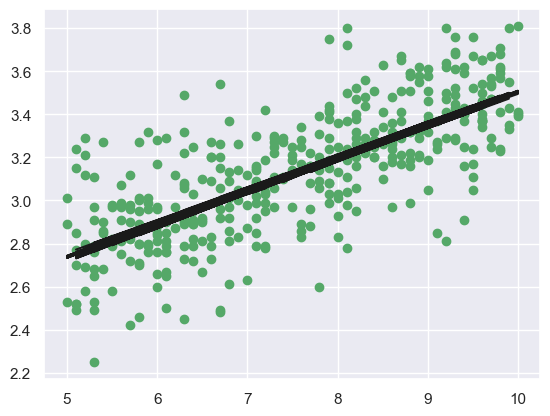

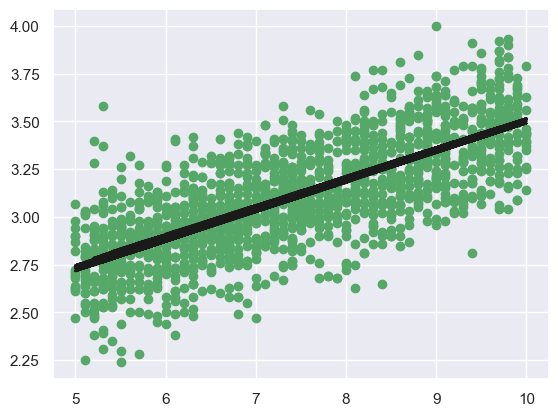

In [280]:
y_pred = model.predict(X_test)
plt.scatter(X_test['Study_Hours_Per_Day'], X_test['GPA'],color='g')
plt.plot(X_test['Study_Hours_Per_Day'], y_pred, color='k')
plt.show()

y_pred = model.predict(X_train)
plt.scatter(X_train['Study_Hours_Per_Day'], X_train['GPA'],color='g')
plt.plot(X_train['Study_Hours_Per_Day'], y_pred, color='k')
plt.show()

In order to see how our model, we can plot the given values against the values for GPA. In the first graph, we have the testing data and in the second graph, we have the training data. In both cases, we can see that there is a positive correlation between study hours and GPA; however, there is a lot of variation in the data which leads to our lower r-squared values of the model. Given these graphs, we have reason to believe that a linear model does represent our data; however, we will continue to try other 

In [282]:
variables = list(df.columns.values)
dict = {}
for each in variables:
    test = 'GPA~' + each
    model = smf.ols(test, df)
    model = model.fit()
    r = model.rsquared_adj
    dict[each] = r
{k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}

{'Sleep_Hours_Per_Day': -0.00048218628185647816,
 'Extracurricular_Hours_Per_Day': 0.0005351537302717979,
 'Social_Hours_Per_Day': 0.006843745857941452,
 'Physical_Activity_Hours_Per_Day': 0.11594275395217035,
 'Stress_Level': 0.3025854820843027,
 'Study_Hours_Per_Day': 0.5392127057073811,
 'GPA': 1.0}

If we look at the best predictors, we see that study hours, stress level, and physical activity had the greatest impact on GPA based on the values of r-squared. If we need to do variable reduction or addition to our model, this is helpful information to have.

In [292]:
formula = 'GPA~Study_Hours_Per_Day'
model = smf.ols(formula, df)
res = model.fit()
print(1, res.rsquared)

for x in range(2,10):
    annoying = '+ np.power(Study_Hours_Per_Day,' + str(x) + ')'
    formula = formula + annoying
    model = smf.ols(formula, df)
    res = model.fit()
    print(x, res.rsquared)

1 0.5394432146089783
2 0.5394956556791237
3 0.5395720056131703
4 0.5395744382788368
5 0.5398204132008578
6 0.5398971743690786
7 0.5399087608478204
8 0.5400553182706231
9 0.5401765380529989


Next, we can see if a polynomial model would be a better fit. Using the best predictor (study hours), we can see if there is a higher polynomial that drastically increases the value of r-squared. However, after running it up to the power of 9, we can see that there is not drastic improvement, so a polynomial model may not be the best fit.

In [295]:
model = smf.ols('GPA~Study_Hours_Per_Day+Extracurricular_Hours_Per_Day+Sleep_Hours_Per_Day+Social_Hours_Per_Day+Physical_Activity_Hours_Per_Day+Stress_Level', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     470.0
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:59:09   Log-Likelihood:                 358.07
No. Observations:                2000   AIC:                            -704.1
Df Residuals:                    1994   BIC:                            -670.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.0232      0.000    106.218      0.000       0.023       0.024
Study_Hours_Per_Day                 0.2370      0.005     47.703      0.000       0.227       0.247
Extracurricular_Hours_Per_Day       0.0752      0.004     19.446      0.000       0.068       0.083
Sleep_Hours_Per_Day                 0.0781      0.003     28.206      0.000       0.073       0.084
Social_Hours_Per_Day                0.0840      0.003     33.014      0.000       0.079       0.089
Physical_Activity_Hours_Per_Day     0.0827      0.002     51.490      0.000       0.080       0.086
Stress_Level                        0.0002      0.010      0.020      0.984      -0.020       0.021
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.850
Skew:                           0.028   Prob(JB):                        0.654
Kurtosis:                       3.084   Cond. No.                     5.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

When we use all variables are predictors, we see that all except stress level are statistically significant. However, as noted at the bottom, there is a strong correlation between the variables. This makes sense as there is a bound of time (all the variables cannot add up to more than 24 hours in day for a single person). This means that we could probably remove at least one of the time variables as it could be written as the time of the other variables subtracted from 24 hours.

In [149]:
model = smf.ols('GPA~Study_Hours_Per_Day+Extracurricular_Hours_Per_Day*Stress_Level', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     586.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:54:28   Log-Likelihood:                 357.02
No. Observations:                2000   AIC:                            -704.0
Df Residuals:                    1995   BIC:                            -676.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      1.9837      0.036     55.867      0.000       1.914       2.053
Study_Hours_Per_Day                            0.1514      0.005     32.051      0.000       0.142       0.161
Extracurricular_Hours_Per_Day                 -0.0082      0.013     -0.625      0.532      -0.034       0.017
Stress_Level                                   0.0066      0.014      0.465      0.642      -0.021       0.034
Extracurricular_Hours_Per_Day:Stress_Level     0.0002      0.005      0.030      0.976      -0.010       0.011
==============================================================================
Omnibus:                        0.709   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.623
Skew:                           0.025   Prob(JB):                        0.732
Kurtosis:                       3.070   Cond. No.                         81.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I played around with the data (trying out different forms of correlations and interactions); however, it would appear that the r-squared would not change. However, it is interesting to note that it would change the impacts of other variables within the interactions (such as extracurricular hours above) where a variable that was statistically significant before was no longer significant. However, this also removed the note of high correlation, so it is likely that GPA is mostly determined by study hours.

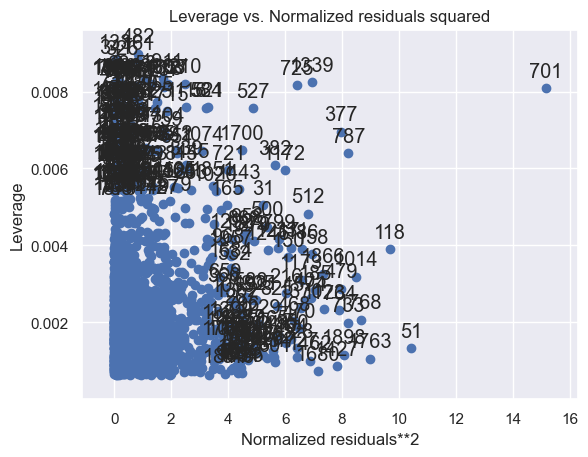

(array([   1,    2,    8,   36,   46,   54,   58,   62,   81,   86,   88,
         99,  113,  121,  133,  149,  151,  160,  161,  168,  171,  180,
        210,  220,  237,  246,  250,  269,  272,  276,  289,  325,  326,
        329,  339,  341,  343,  354,  377,  382,  401,  409,  428,  461,
        482,  488,  521,  527,  545,  584,  588,  592,  629,  642,  648,
        651,  668,  694,  701,  706,  713,  714,  721,  725,  729,  742,
        749,  756,  759,  778,  784,  787,  815,  838,  840,  915,  917,
        933,  936,  939,  952,  955,  973,  988, 1009, 1011, 1039, 1045,
       1057, 1074, 1077, 1080, 1081, 1092, 1094, 1109, 1116, 1117, 1130,
       1172, 1174, 1175, 1177, 1180, 1194, 1211, 1253, 1268, 1303, 1304,
       1339, 1347, 1408, 1410, 1445, 1466, 1487, 1488, 1496, 1510, 1561,
       1603, 1604, 1629, 1648, 1651, 1676, 1700, 1712, 1715, 1716, 1726,
       1743, 1758, 1785, 1798, 1818, 1830, 1835, 1854, 1857, 1890, 1900,
       1909, 1911, 1920, 1927], dtype=int64),)
147

In [163]:
sm.graphics.plot_leverage_resid2(model)
plt.show()

leverage = model.get_influence().hat_matrix_diag
cook_distance = model.get_influence().cooks_distance[0]
leverage_points = np.where(leverage > np.mean(leverage) + 2 * np.std(leverage))
print(leverage_points)
print(len(leverage_points[0]))

Based on Cook's distance, we can see that there are many (147) leverage points. This is around 7% of our data. This is a fairly large number of leverage points which could raise some questions over the accuracy of our model.

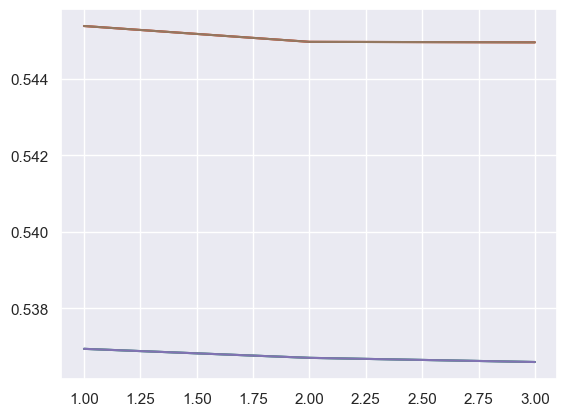

In [172]:
num = [1, 2, 3]
test1 = smf.ols('GPA~Study_Hours_Per_Day', X_test).fit().rsquared_adj
one = smf.ols('GPA~Study_Hours_Per_Day', X_train).fit().rsquared_adj
test2 = smf.ols('GPA~Study_Hours_Per_Day+Stress_Level', X_test).fit().rsquared_adj
two = smf.ols('GPA~Study_Hours_Per_Day+Stress_Level', X_train).fit().rsquared_adj
test3 = smf.ols('GPA~Study_Hours_Per_Day+Stress_Level+Physical_Activity_Hours_Per_Day', X_test).fit().rsquared_adj
three = smf.ols('GPA~Study_Hours_Per_Day+Stress_Level+Physical_Activity_Hours_Per_Day', X_train).fit().rsquared_adj
adjr2_test = [test1, test2, test3]
adjr2_train = [one, two, three]
plt.plot(num, adjr2_train)
plt.plot(num, adjr2_test)
plt.show()

Using our three best predictor variables from earlier, we can plot to see the changes in the adjusted r-squared for the test and training data. However, as noted earlier, there was not a large change in the r-squared with different interactions and variables, so the very little change shown in this map is not suprising. 

Upon doing several types of linear regression (simple, polynomial, multiple), it would seem that the best model was likely just the simple linear regression model using study hours to predict GPA. This is not surprising; however, it was surprising to me that stress levels did not impact GPA more. I think that the linear model did not have a high value of r-squared (and therefore did not preform the best) because of the high variability in the data. Because different people need to study different amounts, there cannot be a perfect relationship between GPA and study hours. In the future, to improve this, I might try to do catergorical regression between GPA and stress levels to see if there is a relationship outside of the number of hours spent on different activities. Additionally, I believe that more data for training and testing would help improve the model.